# Multiple Linear Regression    

## Objectives

* Use scikit-learn to implement Multiple Linear Regression
* Create a model, train it, test it and use the model


### Importing Needed packages


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Downloading Data


In [2]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2024-04-11 07:06:30--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.04s   

2024-04-11 07:06:31 (1.92 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]




<h2 id="understanding_data">Understanding the Data</h2>

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUELTYPE** e.g. z
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


## Loading the Dataset

In [3]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


from matplotlib import pyplot as plt
_df_28['ENGINESIZE'].plot(kind='hist', bins=20, title='ENGINESIZE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_29['CYLINDERS'].plot(kind='hist', bins=20, title='CYLINDERS')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_30['FUELCONSUMPTION_CITY'].plot(kind='hist', bins=20, title='FUELCONSUMPTION_CITY')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_31['FUELCONSUMPTION_HWY'].plot(kind='hist', bins=20, title='FUELCONSUMPTION_HWY')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_32.groupby('MODEL').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_33.groupby('VEHICLECLASS').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_34.groupby('TRANSMISSION').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_35.plot(kind='scatter', x='ENGINESIZE', y='CYLINDERS', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_36.plot(kind='scatter', x='CYLINDERS', y='FUELCONSUMPTION_CITY', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_37.plot(kind='scatter', x='FUELCONSUMPTION_CITY', y='FUELCONSUMPTION_HWY', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_38.plot(kind='scatter', x='FUELCONSUMPTION_HWY', y='FUELCONSUMPTION_COMB', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['MODELYEAR']
  ys = series['ENGINESIZE']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_39.sort_values('MODELYEAR', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('MODEL')):
  _plot_series(series, series_name, i)
  fig.legend(title='MODEL', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MODELYEAR')
_ = plt.ylabel('ENGINESIZE')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['MODELYEAR']
  ys = series['ENGINESIZE']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_40.sort_values('MODELYEAR', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('VEHICLECLASS')):
  _plot_series(series, series_name, i)
  fig.legend(title='VEHICLECLASS', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MODELYEAR')
_ = plt.ylabel('ENGINESIZE')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['MODELYEAR']
  ys = series['ENGINESIZE']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_41.sort_values('MODELYEAR', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('TRANSMISSION')):
  _plot_series(series, series_name, i)
  fig.legend(title='TRANSMISSION', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MODELYEAR')
_ = plt.ylabel('ENGINESIZE')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['MODELYEAR']
  ys = series['FUELCONSUMPTION_CITY']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_42.sort_values('MODELYEAR', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('MODEL')):
  _plot_series(series, series_name, i)
  fig.legend(title='MODEL', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MODELYEAR')
_ = plt.ylabel('FUELCONSUMPTION_CITY')

from matplotlib import pyplot as plt
_df_43['ENGINESIZE'].plot(kind='line', figsize=(8, 4), title='ENGINESIZE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_44['CYLINDERS'].plot(kind='line', figsize=(8, 4), title='CYLINDERS')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_45['FUELCONSUMPTION_CITY'].plot(kind='line', figsize=(8, 4), title='FUELCONSUMPTION_CITY')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_46['FUELCONSUMPTION_HWY'].plot(kind='line', figsize=(8, 4), title='FUELCONSUMPTION_HWY')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['VEHICLECLASS'].value_counts()
    for x_label, grp in _df_47.groupby('MODEL')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('MODEL')
_ = plt.ylabel('VEHICLECLASS')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['TRANSMISSION'].value_counts()
    for x_label, grp in _df_48.groupby('VEHICLECLASS')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('VEHICLECLASS')
_ = plt.ylabel('TRANSMISSION')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_49['MODEL'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_49, x='ENGINESIZE', y='MODEL', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_50['VEHICLECLASS'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_50, x='ENGINESIZE', y='VEHICLECLASS', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_51['TRANSMISSION'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_51, x='ENGINESIZE', y='TRANSMISSION', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_52['MODEL'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_52, x='CYLINDERS', y='MODEL', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [4]:
df.shape

(1067, 13)

In [5]:
# Understand the Statistical information of the dataset
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


from matplotlib import pyplot as plt
_df_16['MODELYEAR'].plot(kind='hist', bins=20, title='MODELYEAR')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['ENGINESIZE'].plot(kind='hist', bins=20, title='ENGINESIZE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['CYLINDERS'].plot(kind='hist', bins=20, title='CYLINDERS')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['FUELCONSUMPTION_CITY'].plot(kind='hist', bins=20, title='FUELCONSUMPTION_CITY')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='MODELYEAR', y='ENGINESIZE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='ENGINESIZE', y='CYLINDERS', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='CYLINDERS', y='FUELCONSUMPTION_CITY', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x='FUELCONSUMPTION_CITY', y='FUELCONSUMPTION_HWY', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24['MODELYEAR'].plot(kind='line', figsize=(8, 4), title='MODELYEAR')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_25['ENGINESIZE'].plot(kind='line', figsize=(8, 4), title='ENGINESIZE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_26['CYLINDERS'].plot(kind='line', figsize=(8, 4), title='CYLINDERS')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_27['FUELCONSUMPTION_CITY'].plot(kind='line', figsize=(8, 4), title='FUELCONSUMPTION_CITY')
plt.gca().spines[['top', 'right']].set_visible(False)

## Selecting Features for Regression

In [6]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


from matplotlib import pyplot as plt
_df_0['ENGINESIZE'].plot(kind='hist', bins=20, title='ENGINESIZE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['CYLINDERS'].plot(kind='hist', bins=20, title='CYLINDERS')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['FUELCONSUMPTION_CITY'].plot(kind='hist', bins=20, title='FUELCONSUMPTION_CITY')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['FUELCONSUMPTION_HWY'].plot(kind='hist', bins=20, title='FUELCONSUMPTION_HWY')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='ENGINESIZE', y='CYLINDERS', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='CYLINDERS', y='FUELCONSUMPTION_CITY', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='FUELCONSUMPTION_CITY', y='FUELCONSUMPTION_HWY', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='FUELCONSUMPTION_HWY', y='FUELCONSUMPTION_COMB', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['CYLINDERS']
  ys = series['ENGINESIZE']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('CYLINDERS', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CYLINDERS')
_ = plt.ylabel('ENGINESIZE')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['CYLINDERS']
  ys = series['FUELCONSUMPTION_CITY']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('CYLINDERS', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CYLINDERS')
_ = plt.ylabel('FUELCONSUMPTION_CITY')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['CYLINDERS']
  ys = series['FUELCONSUMPTION_HWY']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('CYLINDERS', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CYLINDERS')
_ = plt.ylabel('FUELCONSUMPTION_HWY')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['CYLINDERS']
  ys = series['FUELCONSUMPTION_COMB']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('CYLINDERS', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CYLINDERS')
_ = plt.ylabel('FUELCONSUMPTION_COMB')

from matplotlib import pyplot as plt
_df_12['ENGINESIZE'].plot(kind='line', figsize=(8, 4), title='ENGINESIZE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['CYLINDERS'].plot(kind='line', figsize=(8, 4), title='CYLINDERS')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['FUELCONSUMPTION_CITY'].plot(kind='line', figsize=(8, 4), title='FUELCONSUMPTION_CITY')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['FUELCONSUMPTION_HWY'].plot(kind='line', figsize=(8, 4), title='FUELCONSUMPTION_HWY')
plt.gca().spines[['top', 'right']].set_visible(False)

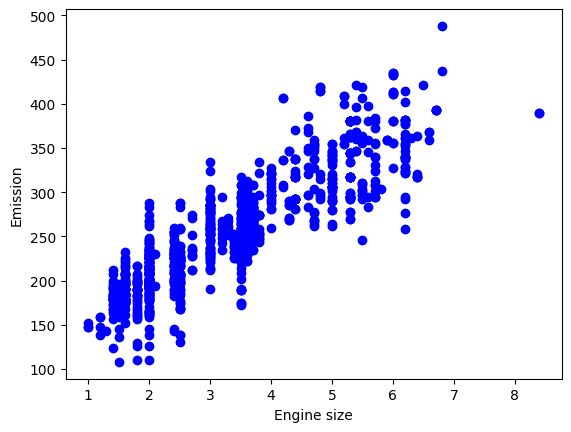

In [8]:
# Plotting Emission Valus wrt Engine Size
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

We know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. Around 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using the  __np.random.rand()__ function:


In [9]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

Train Data Distribution

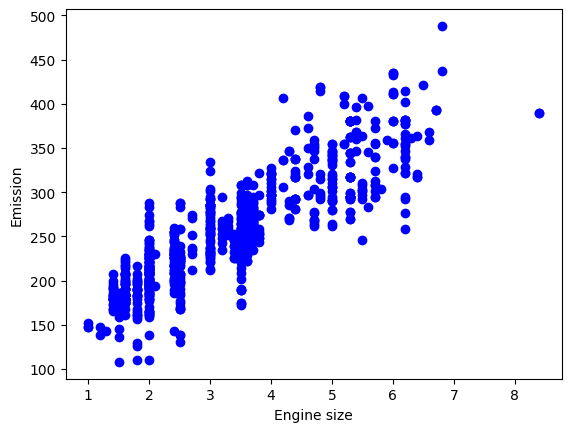

In [10]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## Multiple Regression Model

In reality, there are multiple variables that impact the CO2 emission. When more than one independent variable is present, the process is called multiple linear regression. An example of multiple linear regression is predicting CO2 emission using the features FUELCONSUMPTION_COMB, EngineSize and Cylinders of cars. The good thing here is that multiple linear regression model is the extension of the simple linear regression model.


In [11]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[10.36528527  7.43962077  9.72033696]]


As mentioned before, __Coefficient__ and __Intercept__  are the parameters of the fitted line.
Given that it is a multiple linear regression model with 3 parameters and that the parameters are the intercept and coefficients of the hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

#### Ordinary Least Squares (OLS)
OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ($\hat{y}$) over all samples in the dataset.

OLS can find the best parameters using of the following methods:
* Solving the model parameters analytically using closed-form equations
* Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)


## Prediction

In [12]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Mean Squared Error (MSE) : %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Mean Squared Error (MSE) : 457.59
Variance score: 0.89


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


__Explained variance regression score:__  
Let $\hat{y}$ be the estimated target output, y the corresponding (correct) target output, and Var be the Variance (the square of the standard deviation). Then the explained variance is estimated as follows:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$  
The best possible score is 1.0, the lower values are worse.


Checking Accuracy when using FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY instead of FUELCONSUMPTION_COMB for Multiple Linear Regression.

In [13]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)
y_= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"% np.mean((y_ - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))

Coefficients:  [[10.41407076  7.27188721  5.72559045  3.87068174]]
Residual sum of squares: 456.65
Variance score: 0.89


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
